In [1]:
import numpy as np                 
import matplotlib.pyplot as plt
import quantities as pq
import random
import visualstimulation as vs

# Create trials with spike trains

In [2]:
from neo.core import SpikeTrain

trials = []
t_stop = 10*pq.s
orients = np.arange(0, 345, 45)*pq.deg

for i in range(3):
    for orient in orients:
        spikes = random.sample(list(np.arange(0, t_stop.magnitude, 0.1)), np.random.randint(10))*pq.s
        trial = SpikeTrain(np.sort(spikes), t_stop=t_stop, orient=orient)
        trials.append(trial)
    
# print trials
for i, trial in enumerate(trials):
    print("Trial {}, orient {}: {}".format(i, 
                                           trial.annotations["orient"].rescale(pq.deg), 
                                           trial))

Trial 0, orient 0.0: [2.  2.1 2.8 4.3 4.4 7.2] s
Trial 1, orient 45.0: [5.  9.4] s
Trial 2, orient 90.0: [2.3 2.8 3.4 4.7 6.1] s
Trial 3, orient 135.0: [2.6 5.5] s
Trial 4, orient 180.0: [1.4 2.2 3.7 4.2 4.4 6.7 7.2] s
Trial 5, orient 225.0: [4.3 4.5 6.4 7.3 7.5 7.7 8.  8.5] s
Trial 6, orient 270.0: [] s
Trial 7, orient 315.0: [4.6 6.6 6.7 7.3 7.4 7.6] s
Trial 8, orient 0.0: [] s
Trial 9, orient 45.0: [2.1 2.6 4.  4.2 6.5 7.6 8.9] s
Trial 10, orient 90.0: [0.8 1.5] s
Trial 11, orient 135.0: [] s
Trial 12, orient 180.0: [1.8 2.7 2.8 2.9 5.3 6.1 6.2 8.9] s
Trial 13, orient 225.0: [2.3 3.9 5.1 6.4 8.  9. ] s
Trial 14, orient 270.0: [0.  3.  4.1 4.9 5.6 5.9 7.  8.3] s
Trial 15, orient 315.0: [3.1 4.9] s
Trial 16, orient 0.0: [1.] s
Trial 17, orient 45.0: [1.9 3.1 3.7 6.8 8.2] s
Trial 18, orient 90.0: [] s
Trial 19, orient 135.0: [2.4 3.4 5.9 6.1 7.  8.6] s
Trial 20, orient 180.0: [2.3 3.1 8.1 9.1] s
Trial 21, orient 225.0: [] s
Trial 22, orient 270.0: [5.4 5.7] s
Trial 23, orient 315.0: [1

# Plot raster plot for each orientation

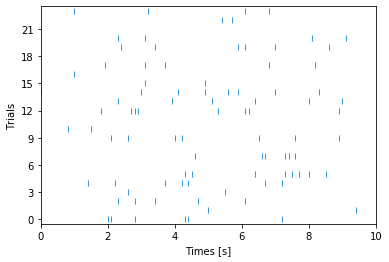

In [3]:
vs.plot.plot_raster(trials)

# Compute and plot orientation tuning

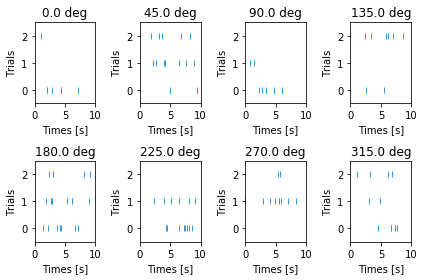

In [4]:
# Group trials based on orientation
orient_trials = vs.data_processing.make_orientation_trials(trials)

ncols = 4
nrows = int(np.ceil(len(orient_trials) / ncols))
fig, axarr = plt.subplots(nrows=nrows, ncols=ncols)
for ax, (orient, t) in zip(axarr.flatten(), orient_trials.items()):
    ax = vs.plot.plot_raster(t, ax=ax)
    ax.set_title(orient)
    
fig.tight_layout()

Text(0.5, 0, 'Rate')

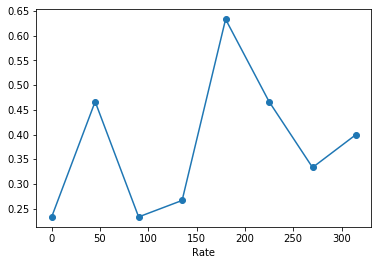

In [5]:
# Compute tuing
rates, orients = vs.analysis.compute_orientation_tuning(orient_trials)

plt.plot(orients, rates, '-o')
plt.xlabel("Orientation")
plt.xlabel("Rate")

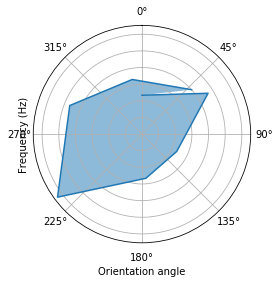

In [6]:
vs.plot.polar_tuning_curve(orients=orients, rates=rates)

# Compute tuning metrics

In [7]:

osi = vs.analysis.compute_osi(orients=orients, rates=rates)
dsi = vs.analysis.compute_dsi(orients=orients, rates=rates)
circ_var = vs.analysis.compute_circular_variance(orients=orients, rates=rates)

print("OSI", osi)
print("DSI", dsi)
print("Circular variance", circ_var)

OSI 0.3103448275862069 dimensionless
DSI 0.4615384615384616 dimensionless
Circular variance 0.8676747848484364 dimensionless
